Введем обозначения для параметров:

* $C_1, C_2 \dots C_n$ — компьютеры.

* $R_1, R_2 \cdots R_m$ — маршрутизаторы.

* $S$ — сервер.

* Пусть $d(x, y)$ (м) — известная функция меры, выражающая кратчайшую длину провода между двумя объектами. Например, для соединения компьютера $C_2$ и маршрутизатора $R_1$ нам необходимо $d(C_2, R_1)$ метров витой пары. 

Константы:

* $c$ (₽) — стоимость маршрутизатора.

* $12$ (₽/м) — стоимость метра оптоволокна от маршрутизацтора до сервера,

* $30$ (₽/м) — стоимость метра витой пары от маршрутизацтора до компьютера.


$F(m)$ — целевая функция, выражающая общую стоимость всех проводов и маршрутизаторов. Нам необходимо её минимизировать, выбрав, сколько маршрутизаторов купить. При выбранном уже числе маршрутизаторов, считаем, что мы уже знаем, где их располагать и какие компьютеры связывать ими. Эта отдельная задача.

$S_{dir}$ — множество номеров компьютеров связанных напрямую с сервером.


$S_{rout_i}$ — множество номеров компьютеров связанных через $i$-й маршрутизатор. Не больше восьми.

Между собой эти множества не пересекаются. Но их объединение дает полное 
множество компьютеров.

$F(m) = 30 \cdot \sum_{i \in S_{dir}} d(C_i, S) + 30 \cdot \sum_{i = 1}^{m}\sum_{j \in S_{rout_i}} d(R_i, C_j) + 12 \cdot \sum_{i = 1}^{m} d(R_i, S) + m \cdot c$

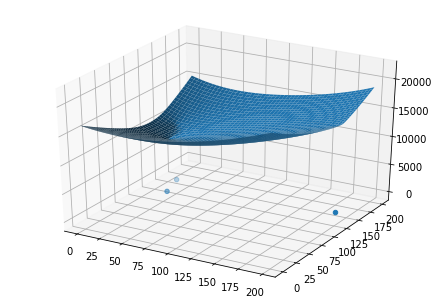

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

price_opt = 12                              # цена оптоволокна
price_twp = 30                              # цена витой пары

l = 200                                     # длина проектируемого пространства
w = 200                                     # ширина проектируемого пространства
n_comp = 3                            # количество компьютеров
price_rout = 2000                         # цена маршрутизатора
n_rout = 1


server = (0, 0)                                                                                       # координаты сервера
comp_xy = np.array([(np.random.randint(l), np.random.randint(w)) for _ in range(n_comp)])

comp_server = np.array(((comp_xy[:, 0] - server[0])**2 + (comp_xy[:, 1] - server[1])**2)**0.5)

f1 = price_twp*np.sum(comp_server)


x_rout = np.arange(0, 200, 1)
y_rout = np.arange(0, 200, 1)
xgrid, ygrid = np.meshgrid(x_rout, y_rout)
comp_rout = np.array([((item[0]-xgrid)**2 + (item[1]-ygrid)**2)**0.5 for item in comp_xy])
server_rout = (xgrid**2+ygrid**2)**0.5
zgrid = price_twp*sum(comp_rout) + price_opt*server_rout + price_rout

x_comp = np.array(comp_xy[:, 0])
y_comp = np.array(comp_xy[:, 1])
z_comp = np.zeros(3)



fig = plt.figure()
axes = Axes3D(fig)

axes.plot_surface(xgrid, ygrid, zgrid)
axes.scatter(x_comp, y_comp, z_comp)

plt.show()